<a href="https://colab.research.google.com/github/HarmanBhutani/ML_projects/blob/main/New_York_Stock_Exchange_Predictions_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York Stock Exhange Predictions RNN-LSTM

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
df =  pd.read_csv('NYSE Data.csv', header=0)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
print(df.shape)

(221675, 7)


In [9]:
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [10]:
print(len(df.symbol.values))

221675


In [11]:
df.describe()

,open,close,low,high,volume
count,221675.000000,221675.000000,221674.000000,221674.000000,2.216740e+05
mean,44.368583,44.386386,43.827288,44.892859,7.078490e+06
std,38.997651,39.011817,38.523293,39.461045,1.672430e+07
min,2.980000,3.020000,2.820000,3.200000,0.000000e+00
25%,23.510000,23.514981,23.180000,23.809999,1.488300e+06
50%,35.750000,35.761429,35.320000,36.150002,3.128400e+06
75%,53.630001,53.641578,53.020000,54.209999,6.629575e+06
max,556.469971,555.650024,551.219971,561.880005,8.596434e+08


In [12]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       1
high      1
volume    1
dtype: int64

In [13]:
df.date.unique()

array(['2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
       '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
       '2016-01-15', '2016-01-19', '2016-01-20', '2016-01-21',
       '2016-01-22', '2016-01-25', '2016-01-26', '2016-01-27',
       '2016-01-28', '2016-01-29', '2016-02-01', '2016-02-02',
       '2016-02-03', '2016-02-04', '2016-02-05', '2016-02-08',
       '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12',
       '2016-02-16', '2016-02-17', '2016-02-18', '2016-02-19',
       '2016-02-22', '2016-02-23', '2016-02-24', '2016-02-25',
       '2016-02-26', '2016-02-29', '2016-03-01', '2016-03-02',
       '2016-03-03', '2016-03-04', '2016-03-07', '2016-03-08',
       '2016-03-09', '2016-03-10', '2016-03-11', '2016-03-14',
       '2016-03-15', '2016-03-16', '2016-03-17', '2016-03-18',
       '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24',
       '2016-03-28', '2016-03-29', '2016-03-30', '2016-03-31',
       '2016-04-01', '2016-04-04', '2016-04-05', '2016-

**Some companies and their opening and closing stock prices.**
**Note: The differences is marginal , you might take open and close same but they are actually different after looking carefully.**

In [16]:
comp_stockss = df['symbol'].unique()[:5]

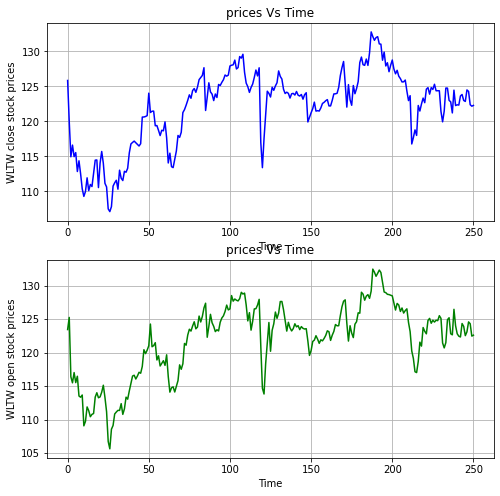

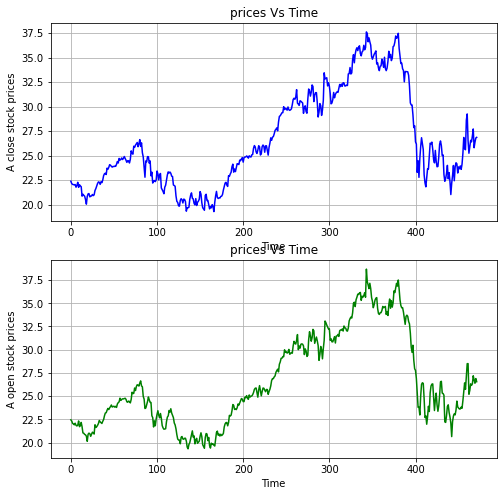

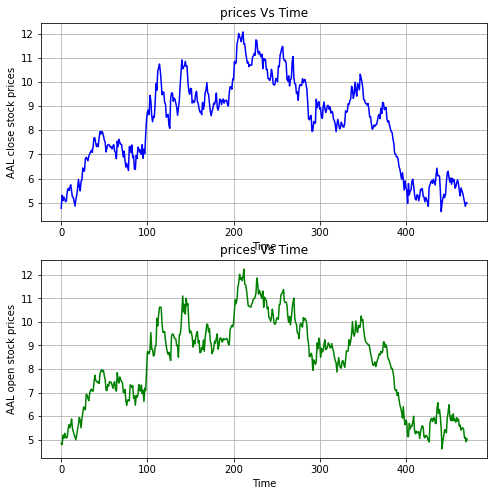

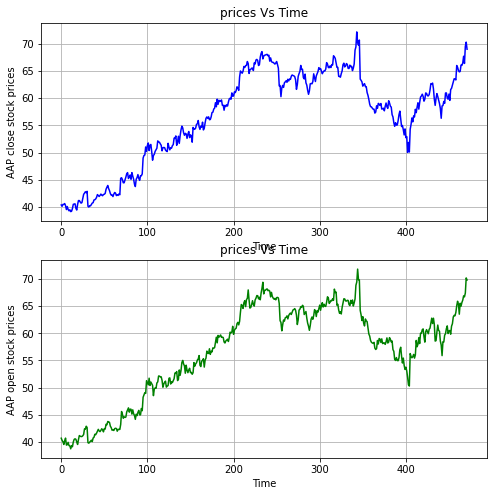

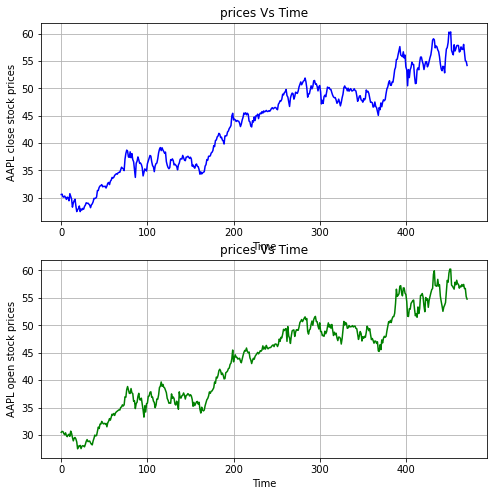

In [17]:
def plotter(code):
    global closing_stock
    global opening_stock
    f, axs = plt.subplots(2,2,figsize=(8,8))
    plt.subplot(212)
    company = df[df['symbol']==code]
    company = company.open.values.astype('float32')
    company = company.reshape(-1, 1)
    opening_stock = company
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(code + " open stock prices")
    plt.title('prices Vs Time')
    plt.plot(company , 'g')
    
    plt.subplot(211)
    company_close = df[df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()
for i in comp_stockss:
    plotter(i)

**Lets take a single stock as a sample to forecast further stock prices.**

In [18]:
closing_stock[: , 0]

array([30.572857, 30.625713, 30.13857 , 30.082857, 30.282858, 30.015715,
       29.674286, 30.092857, 29.918571, 29.418571, 30.72    , 30.247143,
       29.724285, 28.25    , 29.01    , 29.42    , 29.697144, 28.47    ,
       27.437143, 27.818571, 27.98    , 28.461428, 27.435715, 27.922857,
       27.731428, 28.027143, 27.874287, 28.381428, 28.625713, 29.057142,
       28.935715, 28.99    , 28.81    , 28.631428, 28.151428, 28.665714,
       28.857143, 29.231428, 29.855715, 29.835714, 29.904285, 30.101429,
       31.278572, 31.297142, 31.86    , 32.12    , 32.214287, 32.37143 ,
       31.977142, 32.064285, 32.017143, 32.092857, 31.75    , 32.107143,
       32.622856, 32.767143, 32.37857 , 32.985714, 33.19857 , 33.692856,
       33.57143 , 33.71    , 34.07    , 34.22    , 34.37143 , 34.278572,
       34.541428, 34.612858, 34.63286 , 35.09857 , 35.56    , 35.342857,
       35.295715, 34.94143 , 37.03143 , 38.067142, 38.69    , 38.5     ,
       37.434284, 37.37143 , 38.377144, 37.298573, 

In [19]:
stocks = closing_stock[: , 0]
print(stocks)
stocks = stocks.reshape(len(stocks) , 1)

[30.572857 30.625713 30.13857  30.082857 30.282858 30.015715 29.674286
 30.092857 29.918571 29.418571 30.72     30.247143 29.724285 28.25
 29.01     29.42     29.697144 28.47     27.437143 27.818571 27.98
 28.461428 27.435715 27.922857 27.731428 28.027143 27.874287 28.381428
 28.625713 29.057142 28.935715 28.99     28.81     28.631428 28.151428
 28.665714 28.857143 29.231428 29.855715 29.835714 29.904285 30.101429
 31.278572 31.297142 31.86     32.12     32.214287 32.37143  31.977142
 32.064285 32.017143 32.092857 31.75     32.107143 32.622856 32.767143
 32.37857  32.985714 33.19857  33.692856 33.57143  33.71     34.07
 34.22     34.37143  34.278572 34.541428 34.612858 34.63286  35.09857
 35.56     35.342857 35.295715 34.94143  37.03143  38.067142 38.69
 38.5      37.434284 37.37143  38.377144 37.298573 38.05     36.954285
 36.57     35.17857  33.694286 36.284286 36.645714 37.44143  36.908573
 36.26     36.317142 36.05143  35.477142 33.965714 34.61714  35.251427
 35.03143  34.872856 36

**Feature scaling the vector for better model performance.**

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
stocks = scaler.fit_transform(stocks)

In [23]:
len(stocks)

472

In [26]:
train = int(len(stocks) * 0.80)
test = len(stocks) - train

In [22]:
print(train , test)

377 95


In [ ]:
train = stocks[0:train]


In [28]:
test = stocks[len(train) : ]

In [29]:
train = train.reshape(len(train) , 1)
test = test.reshape(len(test) , 1)

In [30]:
print(train.shape , test.shape)

(377, 1) (95, 1)


**process_data for the required input for LSTM.**

In [31]:
def process_data(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

**Here I am taking 2 past values to predict a single value. This has already been checked and optimized after taking several cases.**

In [32]:
n_features = 2

trainX, trainY = process_data(train, n_features)
testX, testY = process_data(test, n_features)

In [33]:
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(374, 2) (374,) (92, 2) (92,)


**Reshaping again for required LSTM input as (sample , timestamp , features per sample).**

**Here I am taking timestamp as 1.**

In [34]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [40]:
trainX

array([[[9.5399439e-02, 9.7006738e-02]],

       [[9.7006738e-02, 8.2192898e-02]],

       [[8.2192898e-02, 8.0498695e-02]],

       [[8.0498695e-02, 8.6580634e-02]],

       [[8.6580634e-02, 7.8456938e-02]],

       [[7.8456938e-02, 6.8074167e-02]],

       [[6.8074167e-02, 8.0802798e-02]],

       [[8.0802798e-02, 7.5502813e-02]],

       [[7.5502813e-02, 6.0297966e-02]],

       [[6.0297966e-02, 9.9873960e-02]],

       [[9.9873960e-02, 8.5494578e-02]],

       [[8.5494578e-02, 6.9594622e-02]],

       [[6.9594622e-02, 2.4762094e-02]],

       [[2.4762094e-02, 4.7873497e-02]],

       [[4.7873497e-02, 6.0341418e-02]],

       [[6.0341418e-02, 6.8769276e-02]],

       [[6.8769276e-02, 3.1452239e-02]],

       [[3.1452239e-02, 4.3451786e-05]],

       [[4.3451786e-05, 1.1642516e-02]],

       [[1.1642516e-02, 1.6551495e-02]],

       [[1.6551495e-02, 3.1191587e-02]],

       [[3.1191587e-02, 0.0000000e+00]],

       [[0.0000000e+00, 1.4813840e-02]],

       [[1.4813840e-02, 8.9925528e

In [41]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam , SGD , RMSprop

**Checkpointing the model when required and using other callbacks.**

In [42]:
filepath="stock_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

## My personal tuned architecture for best performance on kaggle till date.

**The learning rate has been tuned for several times and so is the batch_size and the neurons in the layers.**

In [44]:
model = Sequential()
model.add(LSTM(256))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))


In [46]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [48]:
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    

Epoch 1/100
3/3 [==============================] - 3s 261ms/step - loss: 0.2094 - mean_squared_error: 0.2094 - val_loss: 0.6721 - val_mean_squared_error: 0.6721

Epoch 00001: val_loss improved from -inf to 0.67212, saving model to stock_weights.hdf5
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1924 - mean_squared_error: 0.1924 - val_loss: 0.6278 - val_mean_squared_error: 0.6278

Epoch 00002: val_loss did not improve from 0.67212
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1800 - mean_squared_error: 0.1800 - val_loss: 0.5783 - val_mean_squared_error: 0.5783

Epoch 00003: val_loss did not improve from 0.67212
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 0.1616 - mean_squared_error: 0.1616 - val_loss: 0.5249 - val_mean_squared_error: 0.5249

Epoch 00004: val_loss did not improve from 0.67212
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1526 - mean_squared_error: 0.1526 - val_

In [49]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               265216    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 281,729
Trainable params: 281,729
Non-trainable params: 0
_________________________________________________________________
None


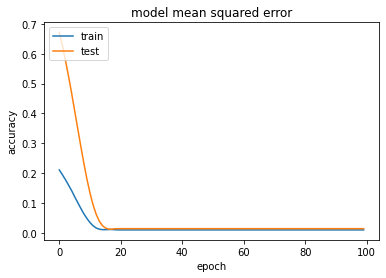

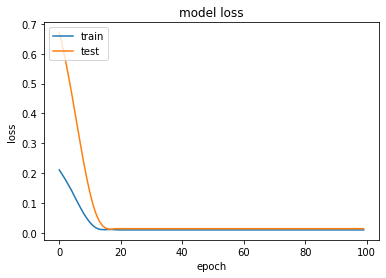

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## The score below is best on kaggle kernels till date.

## The mean square error for validation set is 0.000328 which is very low and good as well.

In [51]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, trainX, trainY , testX, testY)

Train Score: 0.00965 MSE (0.10 RMSE)
Test Score: 0.01386 MSE (0.12 RMSE)


(0.009645204059779644, 0.013862867839634418)

**Inverse transforming the scaled vector earlier and checking for the error visually in the graph.**

In [52]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
pred[:10]

array([[48.01369 ],
       [48.38963 ],
       [48.743374],
       [49.0966  ],
       [48.940422],
       [48.680557],
       [48.867985],
       [49.042103],
       [49.363686],
       [50.088795]], dtype=float32)

In [53]:
testY = testY.reshape(testY.shape[0] , 1)
testY = scaler.inverse_transform(testY)
testY[:10]

array([[50.251427],
       [51.028572],
       [51.387142],
       [50.57143 ],
       [50.535713],
       [51.145714],
       [51.11    ],
       [52.131428],
       [53.4     ],
       [53.835712]], dtype=float32)

## The space between the predicted (red) and actual (blue) line is self explanatory for the model tuning and performance.

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


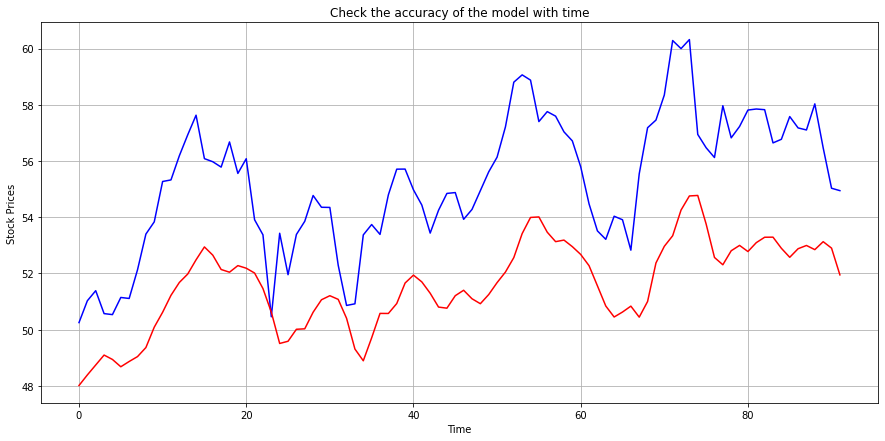

In [54]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(testY , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()